# Purpose of this simulation


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tables
import aopy
import sklearn
from weights import *
from weights_linear_regression import calc_R2_with_sim_C
# so that we write in latex
from matplotlib import rc
import matplotlib.font_manager  # for ubuntu

from afs_plotting import subplots_with_labels

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
rc('text', usetex=False)

np.set_printoptions(precision=5, suppress=True)
sns.set_context('paper')

save_to_gdrive = True # this is done through the gdrive's mapping to the local file system
gdrive_directory = '/home/aolab/gdrive/Projects/Feature Selection/Figures/'
dpi_value = 300

# ideas

In [79]:
# this is for creating exp_conditions that scan the difference across the files
#for comparision
#data_dump_folder = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/more_neurons/run_3/'
# data_dump_folder = \
# 'D:/sim_data/gaussian_peaks/2022_02_02_gaussian_peaks/'

ROUND_DECIMALS = 3


data_dump_folder = \
'/home/aolab/sijia/data/figure7_fraction_of_neurons/'
random_seed = 0
n_neurons = 128
# 
mean_first_peak = 50
mean_second_peak = 100
std = 3
ENCODER_CHANGE_MODE = "same"

# clda setup 
rho = 0.5
batchlen = 100

# noises = np.arange(9)
# noises = np.exp2(noises)
noises = [32]
noise = 32

smoothness_coef = 0.1
num_of_lags = 3#  this is the K in the formulation, the number of batch updated feature scores we expect it to be.
past_batch_decay_factor = 0.2


exp_conds = []

sparsity_array = [0.06]
smoothness_array = np.arange(0.0, 0.15, 0.025) # this is different from the start out from the full feature set


sparsity_array = np.round(sparsity_array, ROUND_DECIMALS)
smoothness_array = np.round(smoothness_array, ROUND_DECIMALS)

num_of_features_array  = [32]   # specify how many features we want to use, or None
#TODO: add 32 to that number of features array

# total_number_of_neurons_array = [32, 64, 128, 256, 512, 1024]
# total_number_of_neurons_array = np.array(total_number_of_neurons_array)
fraction_of_neurons_array =  np.arange(1.0, -0.1, -0.1)


total_number_of_neurons = 128
num_of_features = 32

for sparsity_val in sparsity_array:
    for smoothness_val in smoothness_array:
        for fraction_of_neurons in fraction_of_neurons_array:
            fraction_of_neurons = np.round(fraction_of_neurons, ROUND_DECIMALS)
            exp_conds_add = [f'joint_convex_{1.0}_{random_seed}_noise_{noise}_{total_number_of_neurons}_{mean_second_peak}_{std}_bimodal_weight_{fraction_of_neurons}_clda_rho_{rho}_batchlen_{batchlen}_sparsity_{sparsity_val}_smooth_{smoothness_val}_lags_{num_of_lags}_decay_{past_batch_decay_factor}_num_feats_{num_of_features}_{ENCODER_CHANGE_MODE}' ]
            exp_conds.extend(exp_conds_add)
    #exp_conds.extend(exp_conds_keep)

feature_selection_schemes = ['w/o feature selection', 'convex', 'subset throughout']

NUM_SPARSITY, NUM_SMOOTH = len(sparsity_array), len(smoothness_array)

print("the folder at which data is located:")
print(data_dump_folder)
print(f"we have {len(exp_conds)}" , f"num of sparsity vals {NUM_SPARSITY}", f'num of smoothness vals {NUM_SMOOTH}')
print("fraction first then smoothness")
for e in exp_conds: print(e)


the folder at which data is located:
/home/aolab/sijia/data/figure7_fraction_of_neurons/
we have 66 num of sparsity vals 1 num of smoothness vals 6
fraction first then smoothness
joint_convex_1.0_0_noise_32_128_100_3_bimodal_weight_1.0_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_bimodal_weight_0.9_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_bimodal_weight_0.8_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_bimodal_weight_0.7_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_bimodal_weight_0.6_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_bimodal_weight_0.5_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.

In [80]:
number_of_good_neurons = n_neurons * fraction_of_neurons_array

for n, f in zip(number_of_good_neurons, fraction_of_neurons_array):
    print(f"number of good neurons {n}, fraction of neurons {f}")

number of good neurons 128.0, fraction of neurons 1.0
number of good neurons 115.2, fraction of neurons 0.9
number of good neurons 102.4, fraction of neurons 0.8
number of good neurons 89.60000000000001, fraction of neurons 0.7000000000000001
number of good neurons 76.80000000000001, fraction of neurons 0.6000000000000001
number of good neurons 64.00000000000001, fraction of neurons 0.5000000000000001
number of good neurons 51.20000000000002, fraction of neurons 0.40000000000000013
number of good neurons 38.40000000000002, fraction of neurons 0.30000000000000016
number of good neurons 25.600000000000023, fraction of neurons 0.20000000000000018
number of good neurons 12.800000000000026, fraction of neurons 0.1000000000000002
number of good neurons 2.842170943040401e-14, fraction of neurons 2.220446049250313e-16


In [81]:

from afs_files import load_feature_selection_files
(exp_data_all, exp_metadata_all) = load_feature_selection_files(data_dump_folder, exp_conds)
print(f'we collected {len(exp_data_all)} number of experiments')

we collected 66 number of experiments


In [82]:
# print(f"fraction of neurons {fraction_of_neurons}")
# # reverse exp_data_all
# exp_data_all = exp_data_all[::-1]

# Check feature selection strategies

## check feature weights 

Text(0.5, 1.0, 'Feature distribution std 3 Hz')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

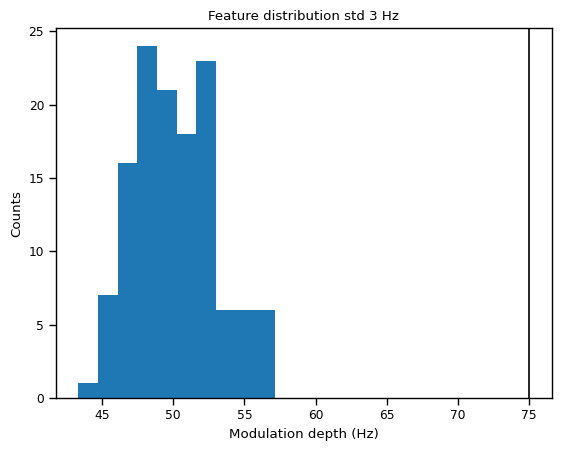

In [83]:


feature_weights = exp_data_all[0]['feature_selection']['feature_weights']
# plot the histogram of the feature weights

fig_weight, ax_weight = plt.subplots()
ax_weight.hist(feature_weights)
ax_weight.axvline(x = 75, color = 'k')
ax_weight.set_xlabel('Modulation depth (Hz)')
ax_weight.set_ylabel('Counts')
ax_weight.set_title(f'Feature distribution std {std} Hz')

## check between conditions

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

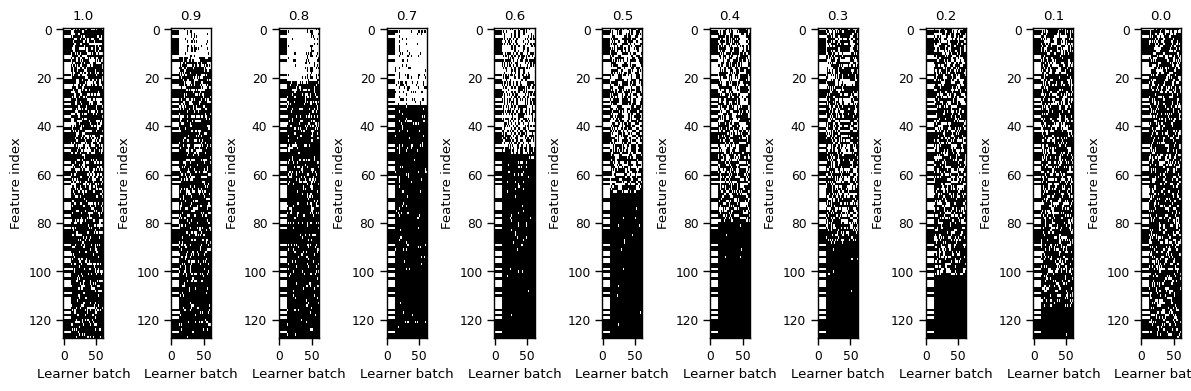

In [84]:
import importlib 
from afs_plotting import plot_feature_selection

num_columns = len(fraction_of_neurons_array)

fig_feat_activity, ax_feat_activity = plt.subplots(1, num_columns,
                                                   figsize = (12, 4))



for i, (e, a, s) in enumerate(zip(exp_data_all,  ax_feat_activity, fraction_of_neurons_array)):
    plot_feature_selection(e['feature_selection']['feat_set'], ax = a)
    
    #only title the exp if there are three exp, right. 
    a.set_title(np.round(s, decimals = ROUND_DECIMALS))

fig_feat_activity.tight_layout()


In [85]:
fraction_of_neurons_array

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [86]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []
selected_feature_batches = [exp_data_all[i]['feature_selection']['feat_set'] for i in range(len(exp_data_all))]
for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())

# num_features_exp_by_batch = np.array(num_features_exp_by_batch)
# selected_feature_batches = np.array(selected_feature_batches)

In [87]:
for s in selected_feature_batches:
    print(s.shape)


smoothness_conds_by_batch = \
[calculate_feature_smoothness(s.T, mode = "incremental") for s in selected_feature_batches]

smoothness_conds_by_batch = np.array(smoothness_conds_by_batch)
print(smoothness_conds_by_batch.shape)

(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(62, 128)
(66, 61)


In [88]:
# smooth the smoothness_conds_by_batch
window_size = 10
weights = np.ones(window_size) / window_size
smoothness_conds_by_batch_ma = np.apply_along_axis(lambda x: np.convolve(x, weights, mode='valid'), 
                                                   axis=1,
                                                   arr=smoothness_conds_by_batch)
smoothness_conds_by_batch_ma_reshape = \
np.reshape(smoothness_conds_by_batch_ma, 
           (len(smoothness_array), len(fraction_of_neurons_array), -1))

## importantly,  we need to flip the order of the smoothness_conds_by_batch_ma_reshape
## because we want the smoothness to be increasing from left to right
smoothness_conds_by_batch_ma_reshape = \
np.flip(smoothness_conds_by_batch_ma_reshape, axis = 1)

# ge the last batch of the smoothness_conds_by_batch_ma_reshape
last_x_number_of_batches = 5
smoothness_conds_by_batch_ma_reshape = \
np.mean(smoothness_conds_by_batch_ma_reshape[:, :, -last_x_number_of_batches:], axis = -1)

print(smoothness_conds_by_batch_ma.shape)
print(smoothness_conds_by_batch_ma_reshape.shape)

(66, 52)
(6, 11)


## PLOT: smoothness conditions

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

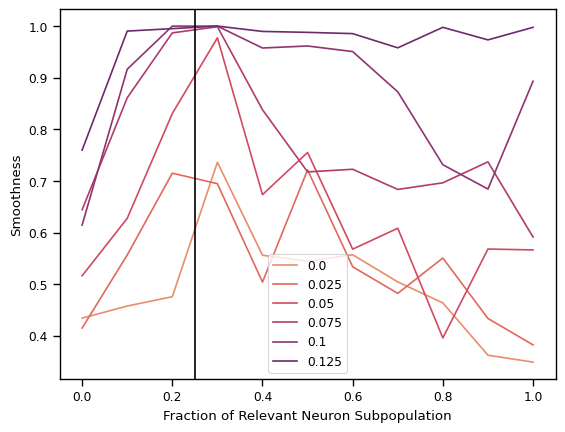

In [89]:
# make a figure that plots the smoothness

colors = sns.color_palette('flare', 
                           n_colors=len(smoothness_array))
norm = plt.Normalize(smoothness_array.min(), 
                     smoothness_array.max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)
fig_smoothness, ax_smoothness = plt.subplots()

for i, (s, c) in enumerate(zip(smoothness_conds_by_batch_ma_reshape, colors)):
    ax_smoothness.plot(fraction_of_neurons_array,s, color = c, label = smoothness_array[i])

# draw a vertical line at set number of neurons
ax_smoothness.axvline(x = num_of_features / total_number_of_neurons, 
                      color = 'k')

ax_smoothness.set_xlabel('Fraction of Relevant Neuron Subpopulation')
ax_smoothness.set_ylabel('Smoothness')
ax_smoothness.legend()


# ax_smoothness.set_ylim([0.5, 1])

In [90]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())

num_features_exp_by_batch = np.array(num_features_exp_by_batch)


# Behaviour comparision

## count how many rewards

In [91]:
fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)

total_rewards_all = list()

for i in range(NUM_EXP):

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']
    
    num_rewards = np.count_nonzero(events == b'REWARD')

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)
    total_rewards_all.append(num_rewards)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 
reward_rate_all = reward_rate_all.reshape((NUM_EXP,-1))
window_stamps_all = window_stamps_all.reshape((NUM_EXP,-1))

total_rewards_all = np.array(total_rewards_all)

In [92]:
num_reward_rates = reward_rate_all.shape[-1]
reward_rate_smooth_fraction = \
np.reshape(reward_rate_all, 
           (len(smoothness_array), len(fraction_of_neurons_array), num_reward_rates))

last_x_number_of_batches = 5

reward_rate_smooth_fraction_mean = \
np.mean(reward_rate_smooth_fraction[:,:,-last_x_number_of_batches:], axis = -1)

## this is important, we need to flip the reward_rate_smooth_fraction_mean along the fraction axis
## because we want to order the data in order of increasing fraction of good neurons
reward_rate_smooth_fraction_mean = np.flip(reward_rate_smooth_fraction_mean, axis = 1)

print(reward_rate_smooth_fraction.shape)
print(reward_rate_smooth_fraction_mean.shape)   



(6, 11, 16)
(6, 11)


## PLOT: of rewards as a function of fraction of good neurons (for each condition)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

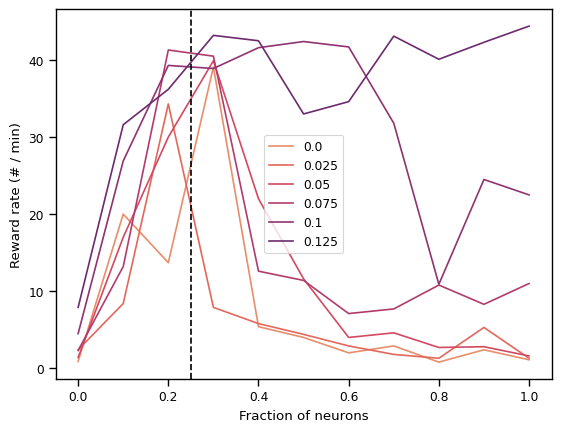

In [93]:
# plot the smoothness of the features
colors = sns.color_palette('flare', 
                           n_colors=len(smoothness_array))
norm = plt.Normalize(smoothness_array.min(), 
                     smoothness_array.max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)

fig_reward_rate, ax_reward_rate = plt.subplots()

for i, (r, c) in enumerate(zip(reward_rate_smooth_fraction_mean, colors)):
    ax_reward_rate.plot(fraction_of_neurons_array, r, color = c, label = smoothness_array[i])
ax_reward_rate.set_xlabel('Fraction of neurons')
ax_reward_rate.set_ylabel('Reward rate (# / min)')
ax_reward_rate.legend()

# add a vertical dotted line to indicate the fraction of neurons that we are selecting
ax_reward_rate.axvline(x = num_of_features / total_number_of_neurons, 
                       color = 'k', linestyle = '--',
                       label = 'Set Number of Neurons')

## PLOT: a combined batch that compares smoothness and reward rate

# Summary Figure for Figure 4

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

(1, 3)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

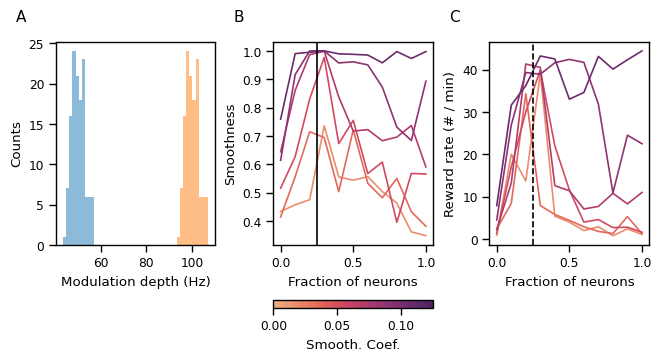

In [94]:
# we make a 4 by 4 figure

figure4, summary_axes = subplots_with_labels(1,3, figsize = (6.5, 3.5))

print(summary_axes.shape)

ax_weight = summary_axes[0,0]
feature_weights = exp_data_all[0]['feature_selection']['feature_weights']
ax_weight.hist(feature_weights, alpha = 0.5 )

feature_weights = exp_data_all[-1]['feature_selection']['feature_weights']
ax_weight.hist(feature_weights, alpha = 0.5 )
ax_weight.set_xlabel('Modulation depth (Hz)')
ax_weight.set_ylabel('Counts')


ax_smoothness = summary_axes[0, 1]
colors = sns.color_palette('flare', 
                           n_colors=len(smoothness_array))
norm = plt.Normalize(smoothness_array.min(), 
                     smoothness_array.max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)


for i, (s, c) in enumerate(zip(smoothness_conds_by_batch_ma_reshape, colors)):
    ax_smoothness.plot(fraction_of_neurons_array,s, color = c, label = smoothness_array[i])

# draw a vertical line at set number of neurons
ax_smoothness.axvline(x = num_of_features / total_number_of_neurons, 
                      color = 'k')

ax_smoothness.set_xlabel('Fraction of neurons')
ax_smoothness.set_ylabel('Smoothness')



ax_reward_rate = summary_axes[0,2]
for i, (r, c) in enumerate(zip(reward_rate_smooth_fraction_mean, colors)):
    ax_reward_rate.plot(fraction_of_neurons_array, r, color = c, label = smoothness_array[i])
ax_reward_rate.set_xlabel('Fraction of neurons')
ax_reward_rate.set_ylabel('Reward rate (# / min)')

# add a vertical dotted line to indicate the fraction of neurons that we are selecting
ax_reward_rate.axvline(x = num_of_features / total_number_of_neurons, 
                       color = 'k', linestyle = '--',
                       label = 'Set Number of Neurons')



cbar = figure4.colorbar(sm, ax=summary_axes[0,1],
                 orientation='horizontal',
                 location = "bottom")
cbar.set_label('Smooth. Coef.')

# figure4.tight_layout()

### save to gdrive

In [95]:
if save_to_gdrive:
    figure4.savefig(gdrive_directory + 'figure7_fraction_neuron_scan.pdf', dpi = dpi_value)
    figure4.savefig(gdrive_directory + 'figure7_fraction_neuron_scan.png', dpi = dpi_value)
    figure4.savefig(gdrive_directory + 'figure7_fraction_neuron_scan.svg', dpi = dpi_value)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because